# Trabajo Computacional no. 01 de Redes Complejas

Grupo: Marco A. Villagran Azuara, Carlos Andres Rios Chavez, Andres Troiano y Rodrigo Sieira.

In [1]:
# Modulos ###########
import networkx as nx
import matplotlib.pylab as plt
from __future__ import division


## Ejercicio No. 1
Considere las tres redes de interacción de proteínas relevadas para levadura disponibles en la página de la materia. Se trata de: una red de interacciones binarias (yeast_Y2H.txt), de copertenencia a complejos proteicos (yeast_AP-MS.txt) y obtenida de literatura (yeast_LIT.txt) obtenidas del Yeast Interactome Database. 

In [2]:
# Input files
# Funcion para leer input files
def ldata(archive):
        f=open(archive)
	data=[]
	for line in f:
		line=line.strip()
		col=line.split()
		data.append(col)
	return data


In [3]:
# Input file paths
archive_bin="./Problemas/yeast_Y2H.txt"
archive_mul="./Problemas/yeast_AP-MS.txt"
archive_lit="./Problemas/yeast_LIT.txt"

## a. Presente una comparación gráfica de las 3 redes.

In [4]:
###### Grafico bin
lista_bin = ldata(archive_bin)
Gbin = nx.Graph()
Gbin.add_edges_from(lista_bin)

###### Grafico mul
lista_mul = ldata(archive_mul)
Gmul = nx.Graph()
Gmul.add_edges_from(lista_mul)

###### Grafico lit
lista_lit = ldata(archive_lit)
Glit = nx.Graph()
Glit.add_edges_from(lista_lit)


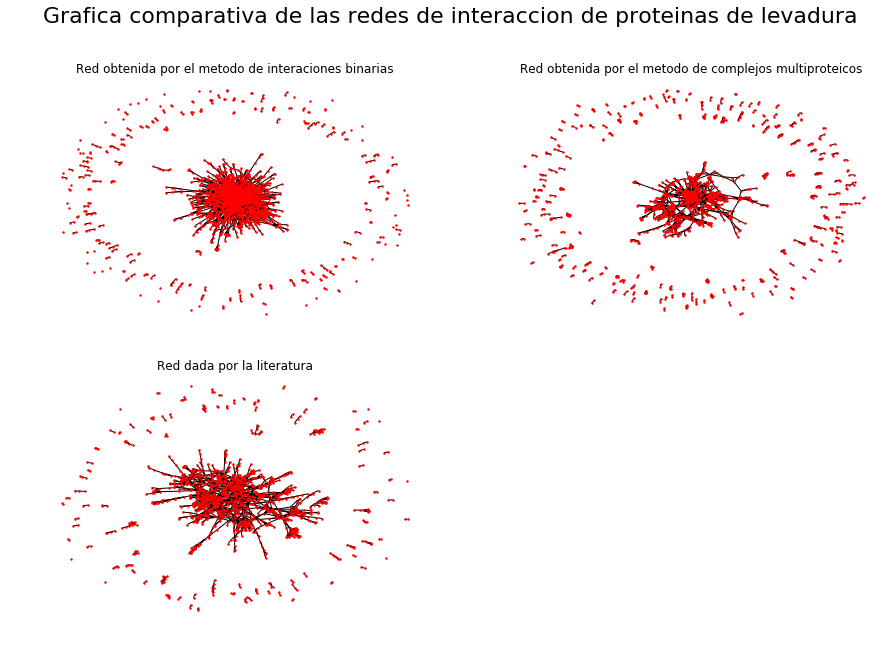

In [5]:
# Plotting

fig = plt.figure(figsize=(15,10))
plt.suptitle("Grafica comparativa de las redes de interaccion de proteinas de levadura", fontsize=22)
plt.subplot(2, 2, 1)
plt.title("Red obtenida por el metodo de interaciones binarias")
nx.draw(Gbin, with_labels=False, font_weight='bold',node_size=2)
plt.subplot(2, 2, 2)
plt.title("Red obtenida por el metodo de complejos multiproteicos")
nx.draw(Gmul, with_labels=False, font_weight='bold',node_size=2)
plt.subplot(2, 2, 3)
plt.title("Red dada por la literatura")
nx.draw(Glit, with_labels=False, font_weight='bold',node_size=2)

plt.show()


## b. Resuma en una tabla las siguientes características de dichas redes


### i. El número total de nodos, N

In [6]:
# Calcular numero de nodos ##############
# Utilizamos la funcion 'number_of_nodes' de Networkx
nodes_bin=Gbin.number_of_nodes()
nodes_mul=Gmul.number_of_nodes()
nodes_lit=Glit.number_of_nodes()

# Imprimir aqui el numero de nodos
print("red_bin\tred_mul\tred_lit")
print(str(nodes_bin) + '\t' + str(nodes_mul) + '\t' + str(nodes_lit))


red_bin	red_mul	red_lit
2018	1622	1536


### ii) El número total de enlaces L, de la red

In [7]:
# Calcular numero de enlaces ##############
# Utilizamos la funcion 'number_of_edges' de Networkx
lbin = Gbin.number_of_edges()
lmul = Gmul.number_of_edges()
llit = Glit.number_of_edges()

# Imprimir aqui el numero de enlaces
print("red_bin\tred_mul\tred_lit")
print(str(lbin) + '\t' + str(lmul) + '\t' + str(llit))


red_bin	red_mul	red_lit
2930	9070	2925


### iii) Si se trata de una red dirigida o no-dirigida


Las redes en estudio representan interacciones físicas entre proteínas. Dado que el vínculo entre dos elementos se da en ambas direcciones, en los tres casos se trata de redes no dirigidas.

### iv) El grado medio $<k>$, el grado máximo $k_{max}$ y el grado mínimo $k_{min}$

El grado medio de una red esta definido por $$<k> = \frac{2m}{n}$$ , donde m es el número de enlaces y n es el nùmero de nodos.

In [8]:
# El grado medio para cada grafo
# Utilizamos la fórmula descripta arriba
avDegree_bin = 2*lbin/nodes_mul
avDegree_mul = 2*lmul/nodes_bin
avDegree_lit = 2*llit/nodes_lit

# Imprimir aqui el grado medio
print("red_bin\tred_mul\tred_lit")
print(str(avDegree_bin) + '\t' + str(avDegree_mul) + '\t' + str(avDegree_lit))


red_bin	red_mul	red_lit
3.61282367448	8.98909811695	3.80859375


In [9]:
# Grados maximo y minimo
# Utilizamos la funcion 'degree' de Networkx
# Luego obtenemos máximo y mínimo con las funciones 'built in' de Python

# Red bin
D_grados_bin = Gbin.degree()
grados_bin =[grados[1] for grados in D_grados_bin]
kmax_bin = max(grados_bin)
kmin_bin = min(grados_bin)

# Red mul
D_grados_mul = Gmul.degree()
grados_mul = [grados[1] for grados in D_grados_mul]
kmax_mul = max(grados_mul)
kmin_mul = min(grados_mul)

# Red lit
D_grados_lit = Glit.degree()
grados_lit = [grados[1] for grados in D_grados_lit]
kmax_lit = max(grados_lit)
kmin_lit = min(grados_lit)

# Imprimir aqui el grado maximo y minimo
print("\tred_bin\tred_mul\tred_lit")
print("kmax\t" + str(kmax_bin) + '\t' + str(kmax_mul) + '\t' + str(kmax_lit))
print("kmin\t" + str(kmin_bin) + '\t' + str(kmin_mul) + '\t' + str(kmin_lit))

	red_bin	red_mul	red_lit
kmax	91	127	40
kmin	1	1	1


### v. La densidad de la red

In [10]:
# Cálculo de las densidades mediante la funcion 'density' de Networkx
densidad_bin = nx.density(Gbin)
densidad_lit = nx.density(Glit)
densidad_mul = nx.density(Gmul)

# Imprimir aqui densidad de las redes
print("red_bin\tred_mul\tred_lit")
print(str(densidad_bin) + '\t' + str(densidad_mul) + '\t' + str(densidad_lit))

red_bin	red_mul	red_lit
0.00143969519736	0.00689927439715	0.00248116856678


### vi. Coeficientes de clustering $<C_{i}>$ y $C_{\Delta}$ de la red

In [11]:
# Cálculo del cluster global (transitividad) mediante la herramienta 'transitivity' de Networkx
c_global_bin = nx.transitivity(Gbin)
c_global_mul = nx.transitivity(Gmul)
c_global_lit = nx.transitivity(Glit)

# Imprimir aqui C_global de las redes
print("red_bin\tred_mul\tred_lit")
print(str(c_global_bin) + '\t' + str(c_global_mul) + '\t' + str(c_global_lit))

red_bin	red_mul	red_lit
0.0236141536405	0.618590162648	0.346192649532


In [12]:
# Cálculo del promedio de los clusterings locales (<Ci>) mediante la funcion 'average_clustering' de Networkx
ci_bin = nx.average_clustering(Gbin)
ci_mul = nx.average_clustering(Gmul)
ci_lit = nx.average_clustering(Glit)

# Imprimir aqui <C> de las redes
print("red_bin\tred_mul\tred_lit")
print(str(ci_bin) + '\t' + str(ci_mul) + '\t' + str(ci_lit))


red_bin	red_mul	red_lit
0.0461940012974	0.554636065701	0.292492300582


### vii) Diámetro de la red

In [13]:
# Generacion de lista con los componentes de las redes mediante Networkx y posterior determinacion del maximo.
# Red bin
componentes_bin = nx.connected_component_subgraphs(Gbin)
diametros_bin = []
for c in componentes_bin:
    diametros_bin.append(nx.diameter(c))

diam_max_bin = max(diametros_bin)

# Red mul
componentes_mul = nx.connected_component_subgraphs(Gmul)
diametros_mul = []
for c in componentes_mul:
    diametros_mul.append(nx.diameter(c))

diam_max_mul = max(diametros_mul)

# Red lit
componentes_lit = nx.connected_component_subgraphs(Glit)
diametros_lit = []
for c in componentes_lit:
    diametros_lit.append(nx.diameter(c))

diam_max_lit = max(diametros_lit)

# Imprimir aqui Ci de las redes
print("red_bin\tred_mul\tred_lit")
print(str(diam_max_bin) + '\t' + str(diam_max_mul) + '\t' + str(diam_max_lit))

red_bin	red_mul	red_lit
14	15	19


In [14]:
# Imprimir tabla con todos los resultados del Problema 1

print ("\t\tred_bin\t\tred_mul\t\tred_lit\n" \
      + "===========================================================\n" \
      + "Nodos\t\t%d\t\t%d\t\t%d\n" %(nodes_bin, nodes_mul, nodes_lit)  \
      + "Enlaces\t\t%d\t\t%d\t\t%d\n" %(lbin, lmul, llit) \
      + "<k>\t\t%.2f\t\t%.2f\t\t%.2f\n" % (avDegree_bin, avDegree_mul, avDegree_lit) \
      + "k max\t\t%.2f\t\t%.2f\t\t%.2f\n" % (kmax_bin, kmax_mul, kmax_lit) \
      + "k min\t\t%.2f\t\t%.2f\t\t%.2f\n" % (kmin_bin, kmin_mul, kmin_lit) \
      + "density\t\t%.4f\t\t%.4f\t\t%.4f\n" % (densidad_bin, densidad_mul, densidad_lit) \
      + "C global\t%.4f\t\t%.4f\t\t%.4f\n" % (c_global_bin, c_global_mul, c_global_lit) \
      + "<C>\t\t%.4f\t\t%.4f\t\t%.4f\n" % (ci_bin, ci_mul, ci_lit) \
      + "Diametro\t%d\t\t%d\t\t%d\n" % (diam_max_bin, diam_max_mul, diam_max_lit))


		red_bin		red_mul		red_lit
Nodos		2018		1622		1536
Enlaces		2930		9070		2925
<k>		3.61		8.99		3.81
k max		91.00		127.00		40.00
k min		1.00		1.00		1.00
density		0.0014		0.0069		0.0025
C global	0.0236		0.6186		0.3462
<C>		0.0462		0.5546		0.2925
Diametro	14		15		19



### c. Teniendo en cuenta la naturaleza de las interacciones reportadas, diga si es razonable lo que encuentra para ciertos observables calculados.



Nodos: la red de interacciones binarias reporta contactos proteína-proteína relevados por un método de biología molecular denominado doble híbrido de levaduras (yeast two hybrid, Y2H): para determinar si dos proteínas interaccionan entre sí, cada una se fusiona a un framento distinto de un factor de transcripción encargado de activar a un gen reportero. En el caso de que las proteínas interaccionen el factor de transcripción fragmentado se reconstituye, permitiendo su unión a la secuencia regulatoria UAS en el ADN y la activación del gen reportero. 
El método Y2H se lleva a cabo mediante estrategias high throughput (de alto rendimiento) que permiten relevar en forma combinatoria y automatizada un alto número de proteínas en simultáneo. Las proteínas constituyen los nodos de las redes analizadas, y por lo tanto es esperable que el número total de nodos de Y2H (2018) sea mayor al de las otras dos. Las redes de co-pertenencia a complejos protéicos (AP-MS) se construyen utilizando anticuerpos específicos para imunoprecipitar una proteína dada, y luego se identifican por espectrometría de masa (MS) todas las proteínas que puedan haber co-inmunoprecipitado con la anterior por formar parte de un complejo multiprotéico. En este caso el tamaño de la red dependerá de la cantidad de anticuerpos de buena calidad (alta afinidad y especificidad) disponibles, y por lo tanto se espera que contenga un número de nodos menor que el de una red Y2H. La red obtenida de la literatura reporta interacciones determinadas por distintos métodos, pero también se espera que no cubra todas las combinaciones posibles analizadas en un método high throughput.

Enlaces: en la red AP-MS, a toda proteína co-inmunoprecipitada en un complejo multiprotéico se le asignan enlaces con la proteína reconocida por el anticuerpo, reportando contactos que probablemente no existen en la naturaleza. Esto aumentaría artificialmente el número de enlaces totales de la red, tal como se observa en los resultados donde los enlaces de AP-MS triplican a los de Y2H y de la literatura. 

Grado medio, grado máximo y densidad: como se mencionó arriba, la red AP-MS aumenta artificialmente el número de vecinos para todas las proteínas que formen parte de complejos multiprotéicos, y por lo tanto se espera que el grado medio, grado máximo y densidad de esta red sean superiores a los de las otras dos.

Coeficiente de clustering: <C> aumenta con la cantidad de vecinos enlazados de una red. En la red AP-MS, si a cada proteína se le asignan enlaces con todas las demás inmunoprecipitadas en el mismo complejo multiprotéico, el coeficiente <C> se ve incrementado artificialmente por la estimación de contactos  probablemente inexistentes en la naturaleza. Los resultados obtenidos en este problema son los esperados dado que la red AP-MS posee el mayor valor de <C>, 12 veces mayor al de la red binaria Y2H. La red de la literatura posee un <C> intermedio, con un valor 6 veces mayor al de Y2H. Esta última observación podría deberse a la posible ocurrencia de falsos negativos en el método Y2H, es decir, un alto número de interacciones proteína-proteína serían indetectables por Y2H pero podrían ser detectadas por varias otras técnicas reportadas en la literatura.

Coeficiente de clustering global: el clustering global reporta el número total de tripletes cerrados sobre el número total de tripletes conectados. El coeficiente de clustering global es más representativo de lo que ocurre con los vecinos de nodos de alto grado, y por lo tanto la red AP-MS debería reportar un valor superior al de las otras dos redes e incluso mayor que su valor de <C>. Los resultados obtenidos concuerdan con lo esperado, dado que el valor del coeficiente de clustering global de AP-MS es 26 veces mayor que el de Y2H y aproximadamente dos veces mayor que el de la red de co-pertenencia a complejos protéicos.
